In [235]:
import geopandas as gpd
import pandas as pd
from os import listdir
import seaborn as sns
from shapely.geometry import Polygon
import geoparquet_io as gpio

In [74]:
size = 1000

In [211]:
liste_files = listdir('carreaux/')

In [212]:
temp = []
for file in liste_files:
    temp.append(pd.read_csv('carreaux/'+ file))

In [213]:
temp_cs = pd.concat(temp).groupby(['x', 'y', 'code_cs'], as_index=False).surface.mean()
temp_cs.surface = temp_cs.surface / size**2 * 100
carreaux_cs = temp_cs.pivot(values='surface', index=['x', 'y'], columns='code_cs').reset_index().fillna(0)

In [214]:
temp_us = pd.concat(temp).groupby(['x', 'y', 'code_us'], as_index=False).surface.mean()
temp_us.surface = temp_us.surface / size**2 * 100
carreaux_us = temp_us.pivot(values='surface', index=['x', 'y'], columns='code_us').reset_index().fillna(0)

In [215]:
carreaux = pd.merge(carreaux_cs, carreaux_us, left_on=['x', 'y'], right_on=['x', 'y'])

In [216]:
geometry = [Polygon([(x,y),(x+size,y),(x+size,y+size),(x,y+size),(x,y) ]) for x,y in zip(carreaux.y, carreaux.x)]

In [217]:
carreaux = gpd.GeoDataFrame(carreaux, geometry=geometry, crs=3035)

In [218]:
carreaux['id_carreau_1km'] =  "FR_CRS3035RES" + str(size) + "mN" + carreaux.x.astype(str) + "E" + carreaux.y.astype(str) 

In [233]:
carreaux['CS1.1'] = carreaux['CS1.1.1.1'] + carreaux['CS1.1.1.2'] + carreaux['CS1.1.2.1'] + carreaux['CS1.1.2.2']
carreaux['CS1.2'] = carreaux['CS1.2.1'] + carreaux['CS1.2.2'] + carreaux['CS1.2.3']
carreaux['CS2.1'] = carreaux['CS2.1.1.1'] + carreaux['CS2.1.1.2'] + carreaux['CS2.1.1.3'] + carreaux['CS2.1.2'] + carreaux['CS2.1.3']
carreaux['CS2.2'] = carreaux['CS2.2.1'] #+ carreaux['CS2.2.2']
carreaux['CS1'] = carreaux['CS1.1'] + carreaux['CS1.2']
carreaux['CS2'] = carreaux['CS2.1'] + carreaux['CS2.2']

In [238]:
carreaux.columns = [col.replace('.', '_') for col in carreaux.columns]

In [239]:
carreaux.to_parquet('ocsge_carreaux_1000m.parquet')
gpio.read('ocsge_carreaux_1000m.parquet') \
    .add_bbox() \
    .sort_hilbert() \
    .write('ocsge_carreaux_1000m.parquet', compression='ZSTD')

WindowsPath('ocsge_carreaux_1000m.parquet')

In [ ]:
carreaux = 

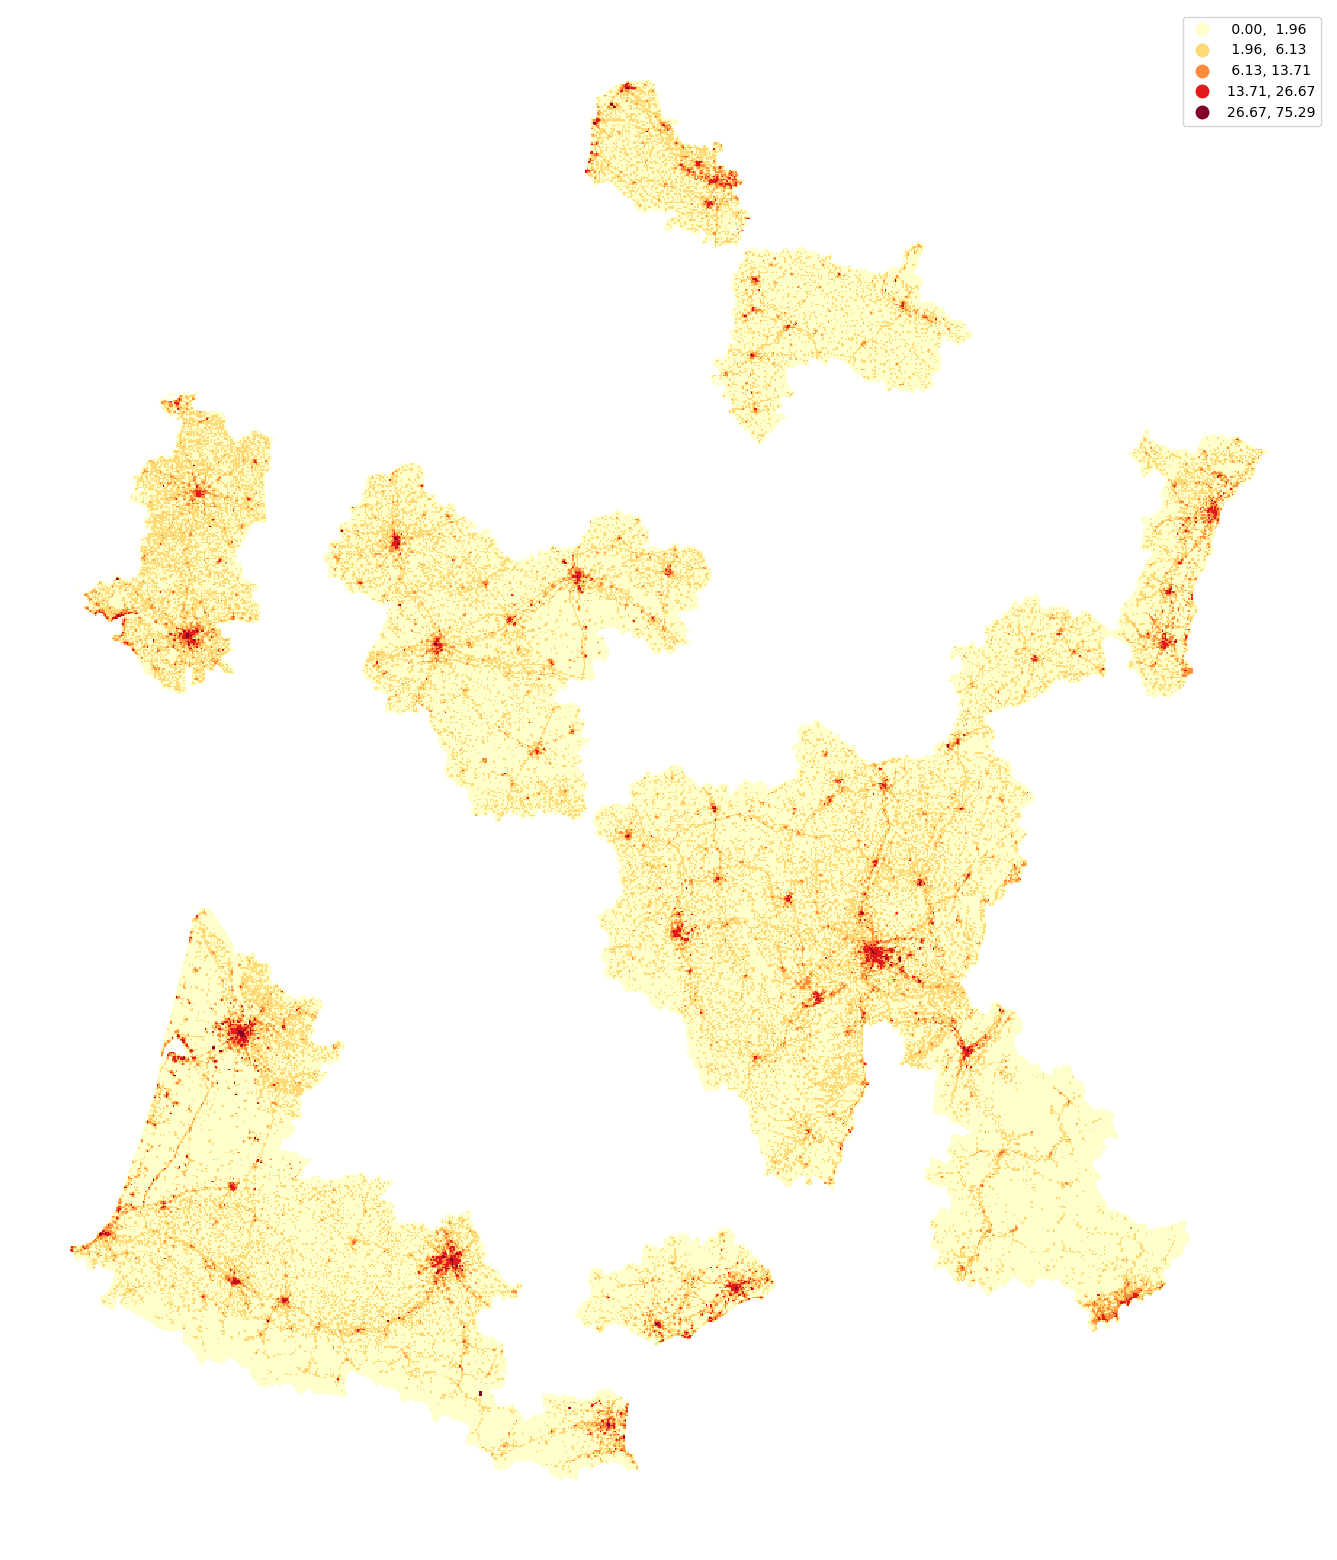

In [139]:
ax = carreaux.plot('CS1.1', cmap='YlOrRd',  scheme='fisher_jenks_sampled' , figsize=(20,20), legend=True)
ax.set_axis_off()

In [140]:
insee = gpd.read_file("carreaux_1km_met.gpkg")

In [141]:
insee = insee.to_crs("EPSG:3035")

In [228]:
test = insee.merge(carreaux.drop(columns=['geometry']), on='id_carreau_1km')

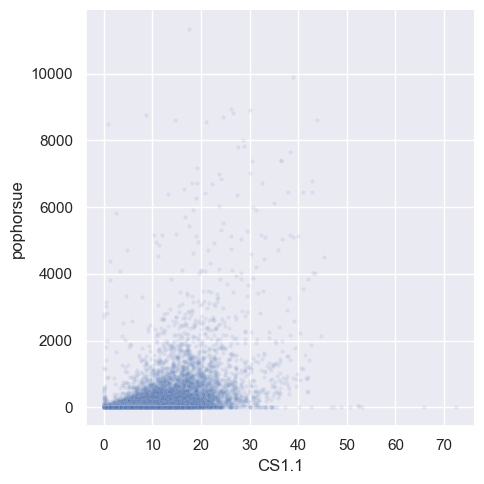

In [229]:
sns.set_theme()

sns.relplot(
    data=test,
    x="CS1.1", y="pophorsue", kind="scatter", s=10, alpha=0.1
)


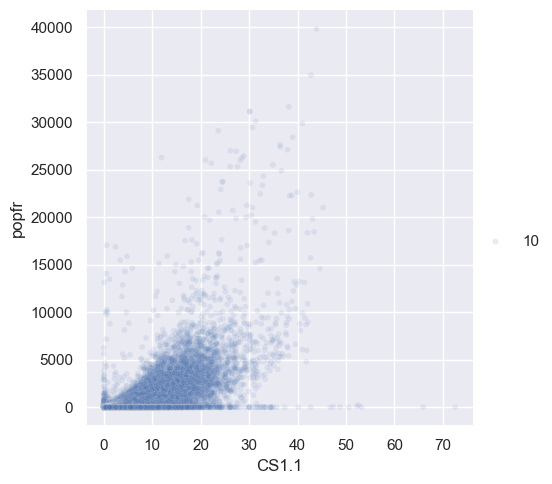

In [231]:
sns.set_theme()

sns.relplot(
    data=test,
    x="CS1.1", y="popfr", kind="scatter", s=10, alpha=0.1
)


In [142]:
test = insee[insee.id_carreau_1km.isin(carreaux.id_carreau_1km)]

In [224]:
test

,id_carreau_1km,carreau_traite_secret,depcom_liste,pop,poph,popf,pop0014,pop1564,pop65p,popfr,...,US4.1.3,US4.1.4,US4.1.5,US4.2,US4.3,US5,US6.1,US6.2,US6.3,US6.6
0,FR_CRS3035RES1000mN2169000E3714000,0.0,66061,38.840985,16.507419,22.333566,1.942049,12.623320,24.275616,29.130739,...,0.0,0.000000,0.0,0.0,0.000000,1.954794,0.0,0.0,0.532358,0.0
1,FR_CRS3035RES1000mN2170000E3703000,0.0,66091,23.044924,12.482667,10.562257,3.840821,6.721436,12.482667,19.204103,...,0.0,0.000000,0.0,0.0,0.204265,1.492686,0.0,0.0,2.567211,0.0
2,FR_CRS3035RES1000mN2171000E3711000,0.0,66179,186.898126,94.496101,92.402025,24.950887,98.008587,63.938651,144.532225,...,0.0,0.000000,0.0,0.0,0.000000,1.729917,0.0,0.0,0.275424,0.0
3,FR_CRS3035RES1000mN2171000E3712000,0.0,66179,92.831218,39.529802,53.301415,5.647669,50.194370,36.989179,72.926522,...,0.0,0.000000,0.0,0.0,0.000000,3.054807,0.0,0.0,0.883812,0.0
4,FR_CRS3035RES1000mN2172000E3705000,0.0,66194,28.398104,15.647805,12.750299,0.000000,10.619395,17.778709,21.639653,...,0.0,0.000000,0.0,0.0,0.000000,1.994939,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293044,FR_CRS3035RES1000mN3132000E3798000,1.0,"59107,59260",13.092919,6.594038,6.498882,1.885822,8.811912,2.395185,12.256362,...,0.0,2.098343,0.0,0.0,0.000000,0.694503,0.0,0.0,1.556868,0.0
293045,FR_CRS3035RES1000mN3132000E3799000,1.0,"59107,59260",6.586305,3.317086,3.269219,0.948650,4.432773,1.204882,6.165481,...,0.0,2.262728,0.0,0.0,0.000000,0.310221,0.0,0.0,3.181713,0.0
293046,FR_CRS3035RES1000mN3132000E3800000,1.0,59260,1.884937,0.794725,1.090212,0.167971,1.182151,0.534816,1.800749,...,0.0,0.778918,0.0,0.0,0.000000,0.309677,0.0,0.0,0.612140,0.0
293047,FR_CRS3035RES1000mN3134000E3796000,1.0,59107,11.843281,5.964677,5.878603,1.705832,7.970869,2.166579,11.086568,...,0.0,0.000000,0.0,0.0,0.000000,0.138631,0.0,0.0,2.836030,0.0


<Axes: >

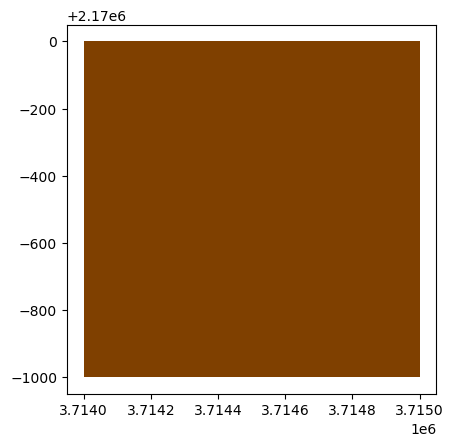

In [148]:
ax=carreaux[carreaux.id_carreau_1km=="FR_CRS3035RES1000mN2169000E3714000"].plot(color='red')
insee[insee.id_carreau_1km=="FR_CRS3035RES1000mN2169000E3714000"].plot(ax=ax, color='green', alpha=0.5)

<Axes: >

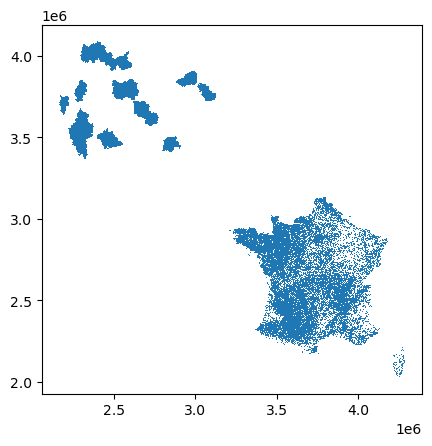

In [123]:
ax = insee.plot()
carreaux.plot(ax=ax)